In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

Data Cleaning

In [2]:
df = pd.read_excel('building_data.xlsx')
df.head

<bound method NDFrame.head of        X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]>

In [3]:
cols = {"X1" : "Relative Compactness","X2" : "Surface Area", "X3" : "Wall Area",
        "X4" :"Roof Area", "X5" :"Overall Height", "X6" :"Orientation", "X7" :"Glazing Area",
        "X8" :"Glazing Area Distribution", "Y1" :"Heating Load", "Y2" :"Cooling Load"}

df.rename(columns = cols, inplace = True)
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
df.isna().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

Data Visulaization:

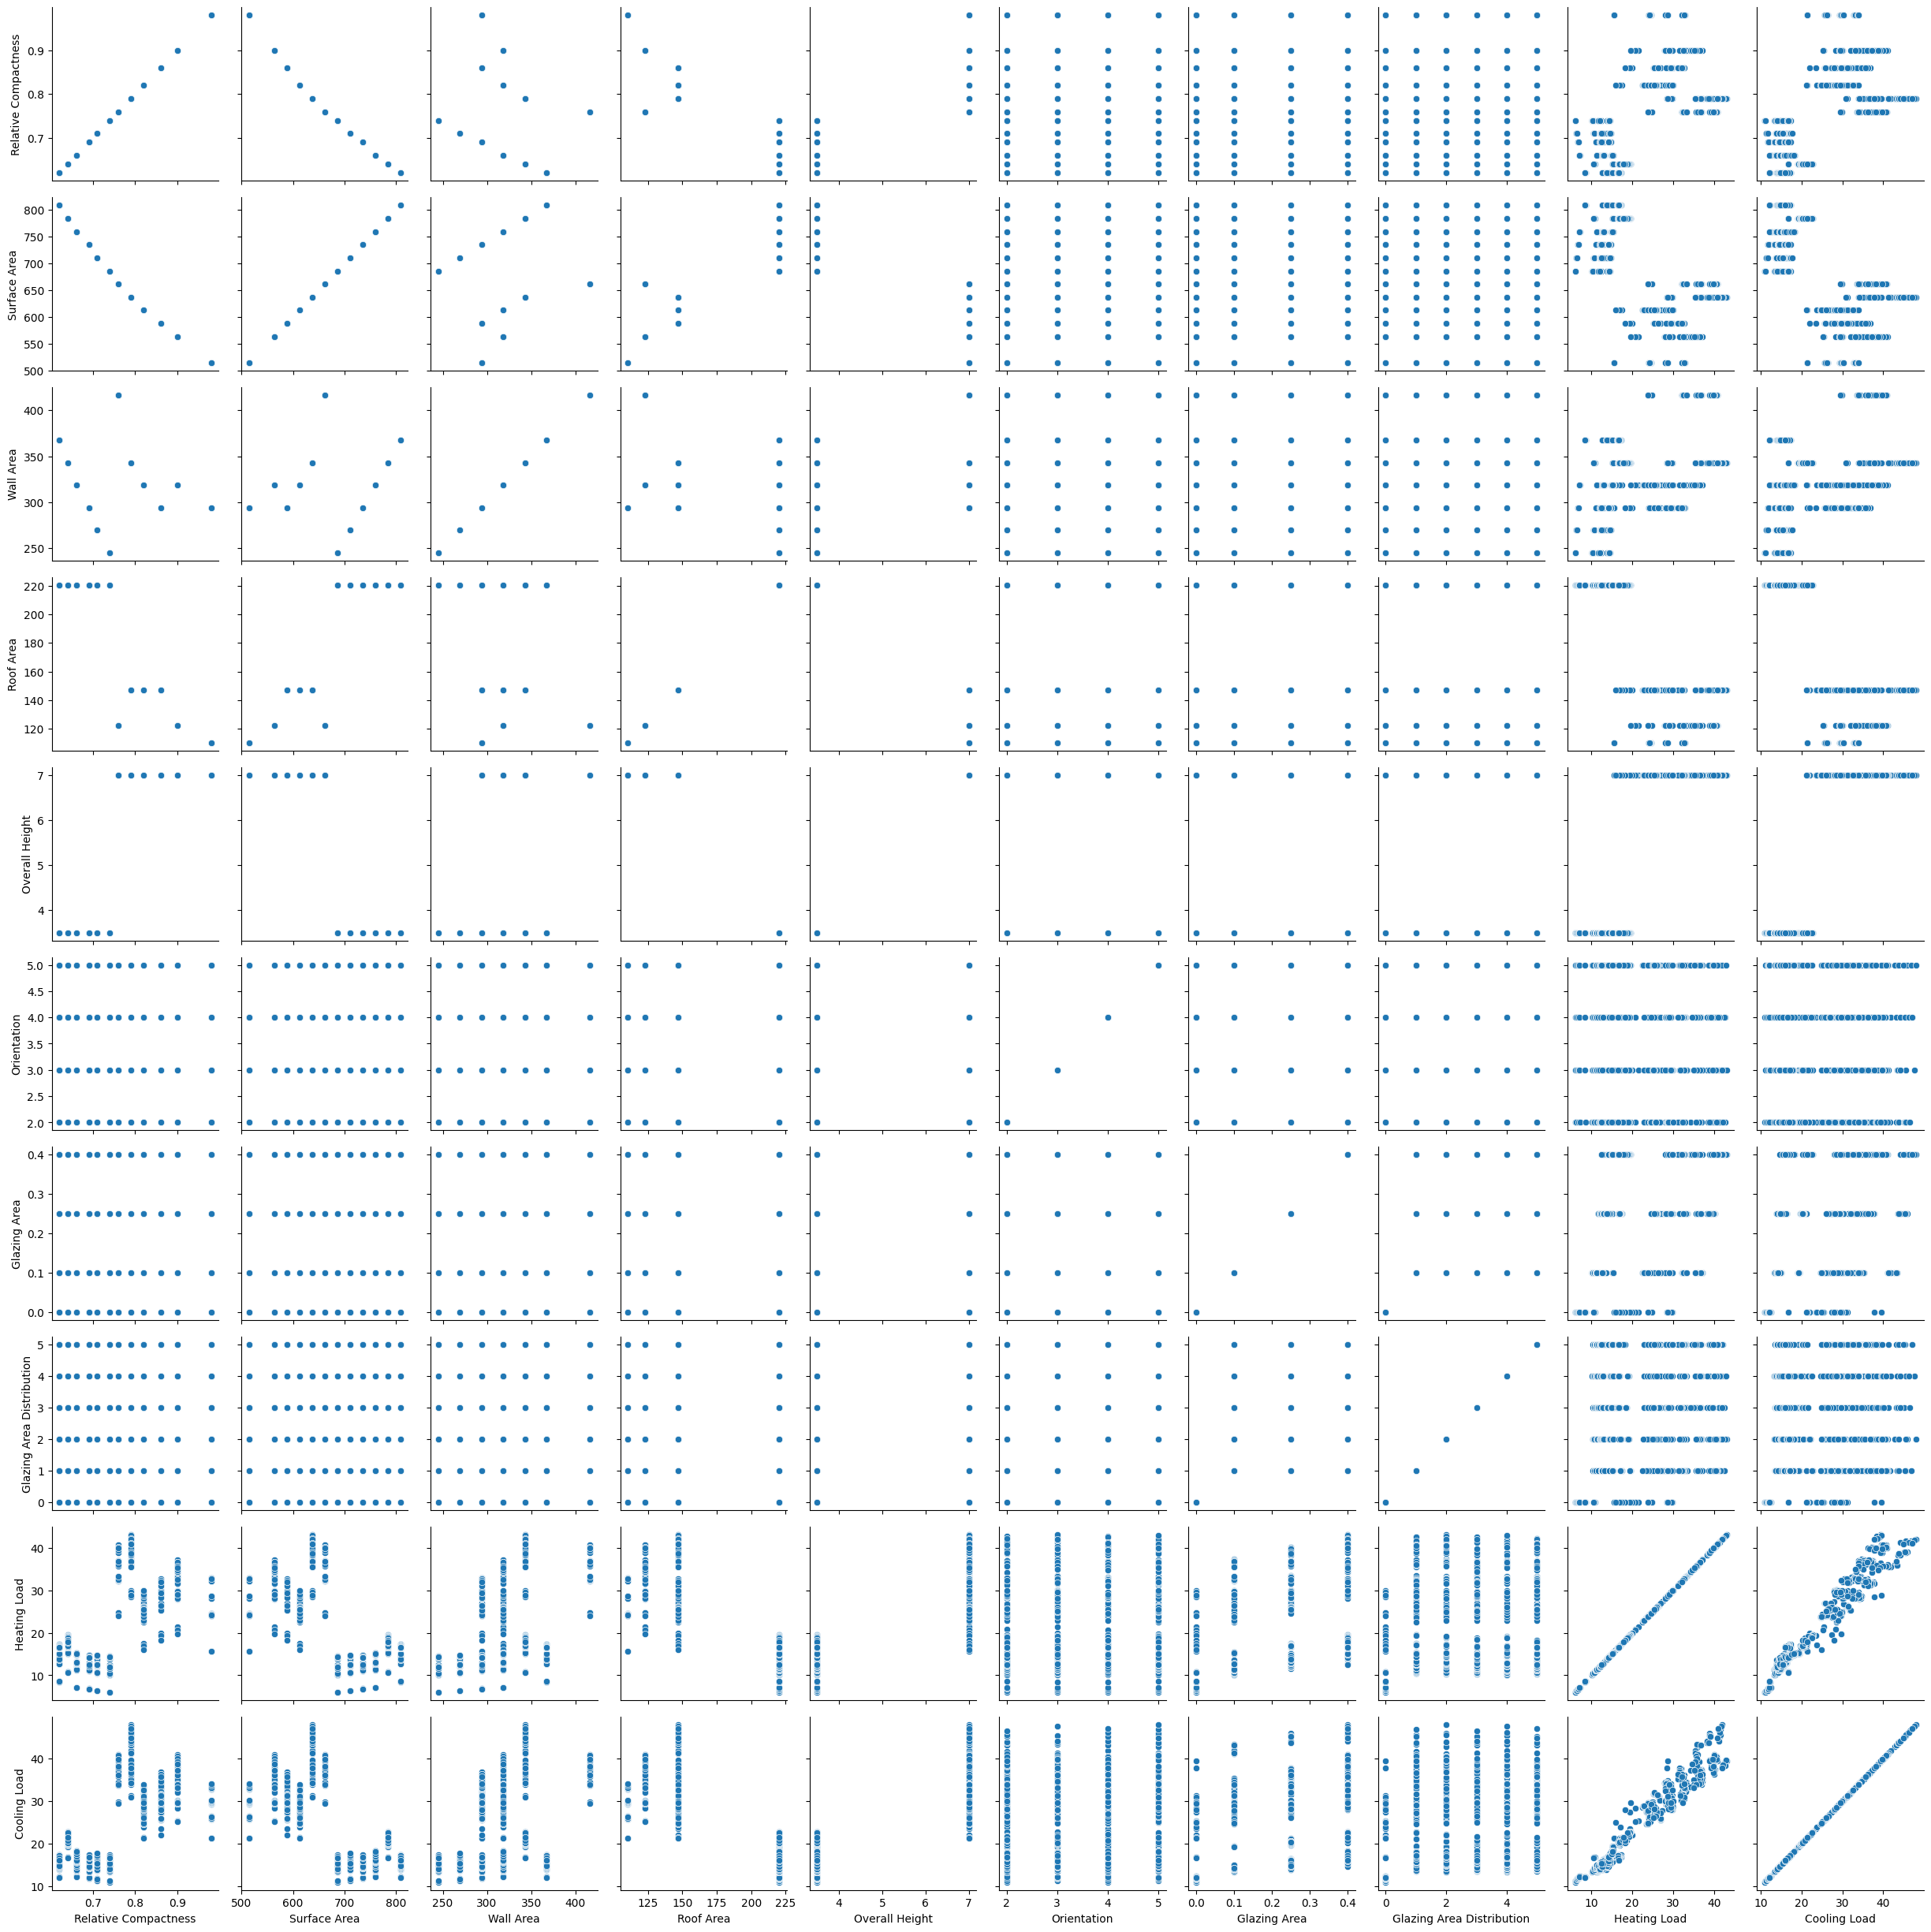

In [5]:
g = sn.PairGrid(df)
g.map(sn.scatterplot)

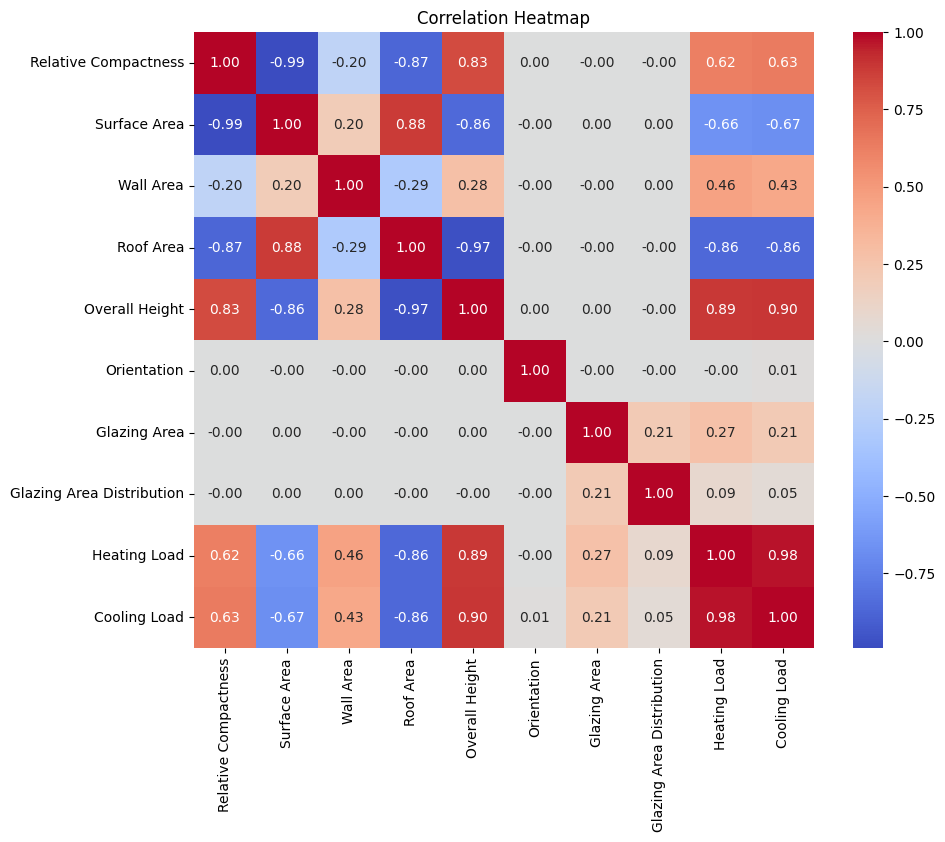

In [6]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sn.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


<Axes: xlabel='Roof Area', ylabel='Heating Load'>

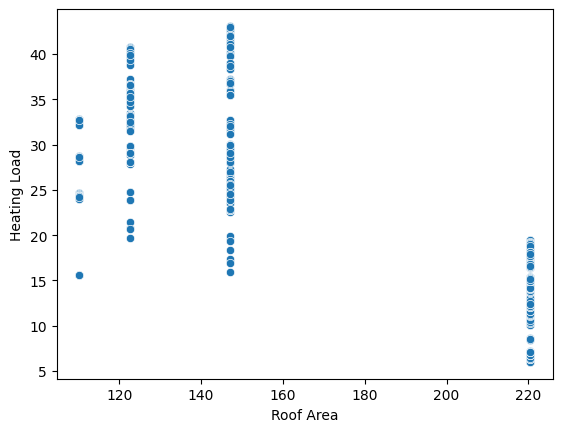

In [9]:
sn.scatterplot(data = df, x = "Roof Area", y="Heating Load")

<Axes: xlabel='Relative Compactness', ylabel='Cooling Load'>

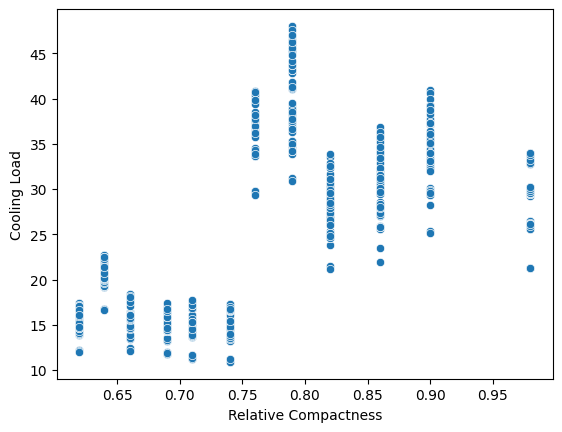

In [10]:
sn.scatterplot(data = df, x = "Relative Compactness", y="Cooling Load")

Text(0.5, 1.0, 'Histogram of Cooling Load')

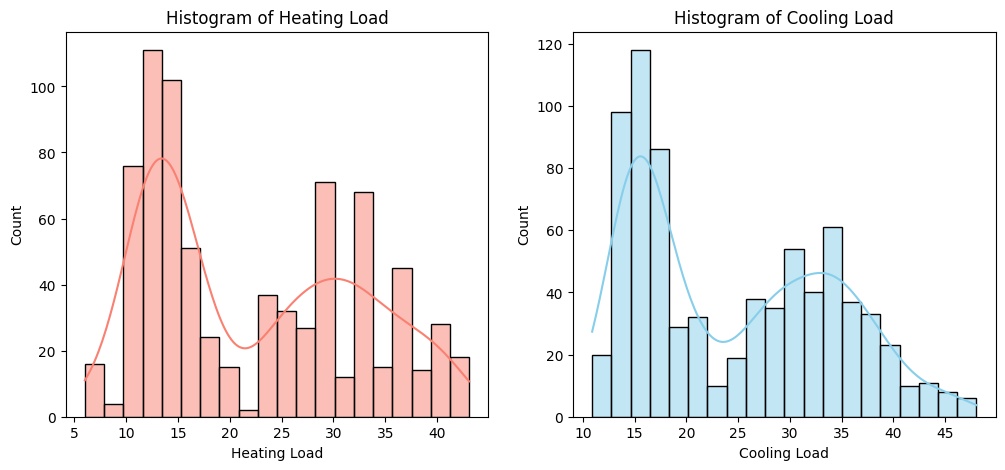

In [20]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sn.histplot(df["Heating Load"], bins=20, kde=True, color="salmon")
plt.title("Histogram of Heating Load")

plt.subplot(1, 2, 2)
sn.histplot(df["Cooling Load"], bins=20, kde=True, color="skyblue")
plt.title("Histogram of Cooling Load")

In [24]:
list(df.columns)[:-2]

['Relative Compactness',
 'Surface Area',
 'Wall Area',
 'Roof Area',
 'Overall Height',
 'Orientation',
 'Glazing Area',
 'Glazing Area Distribution']

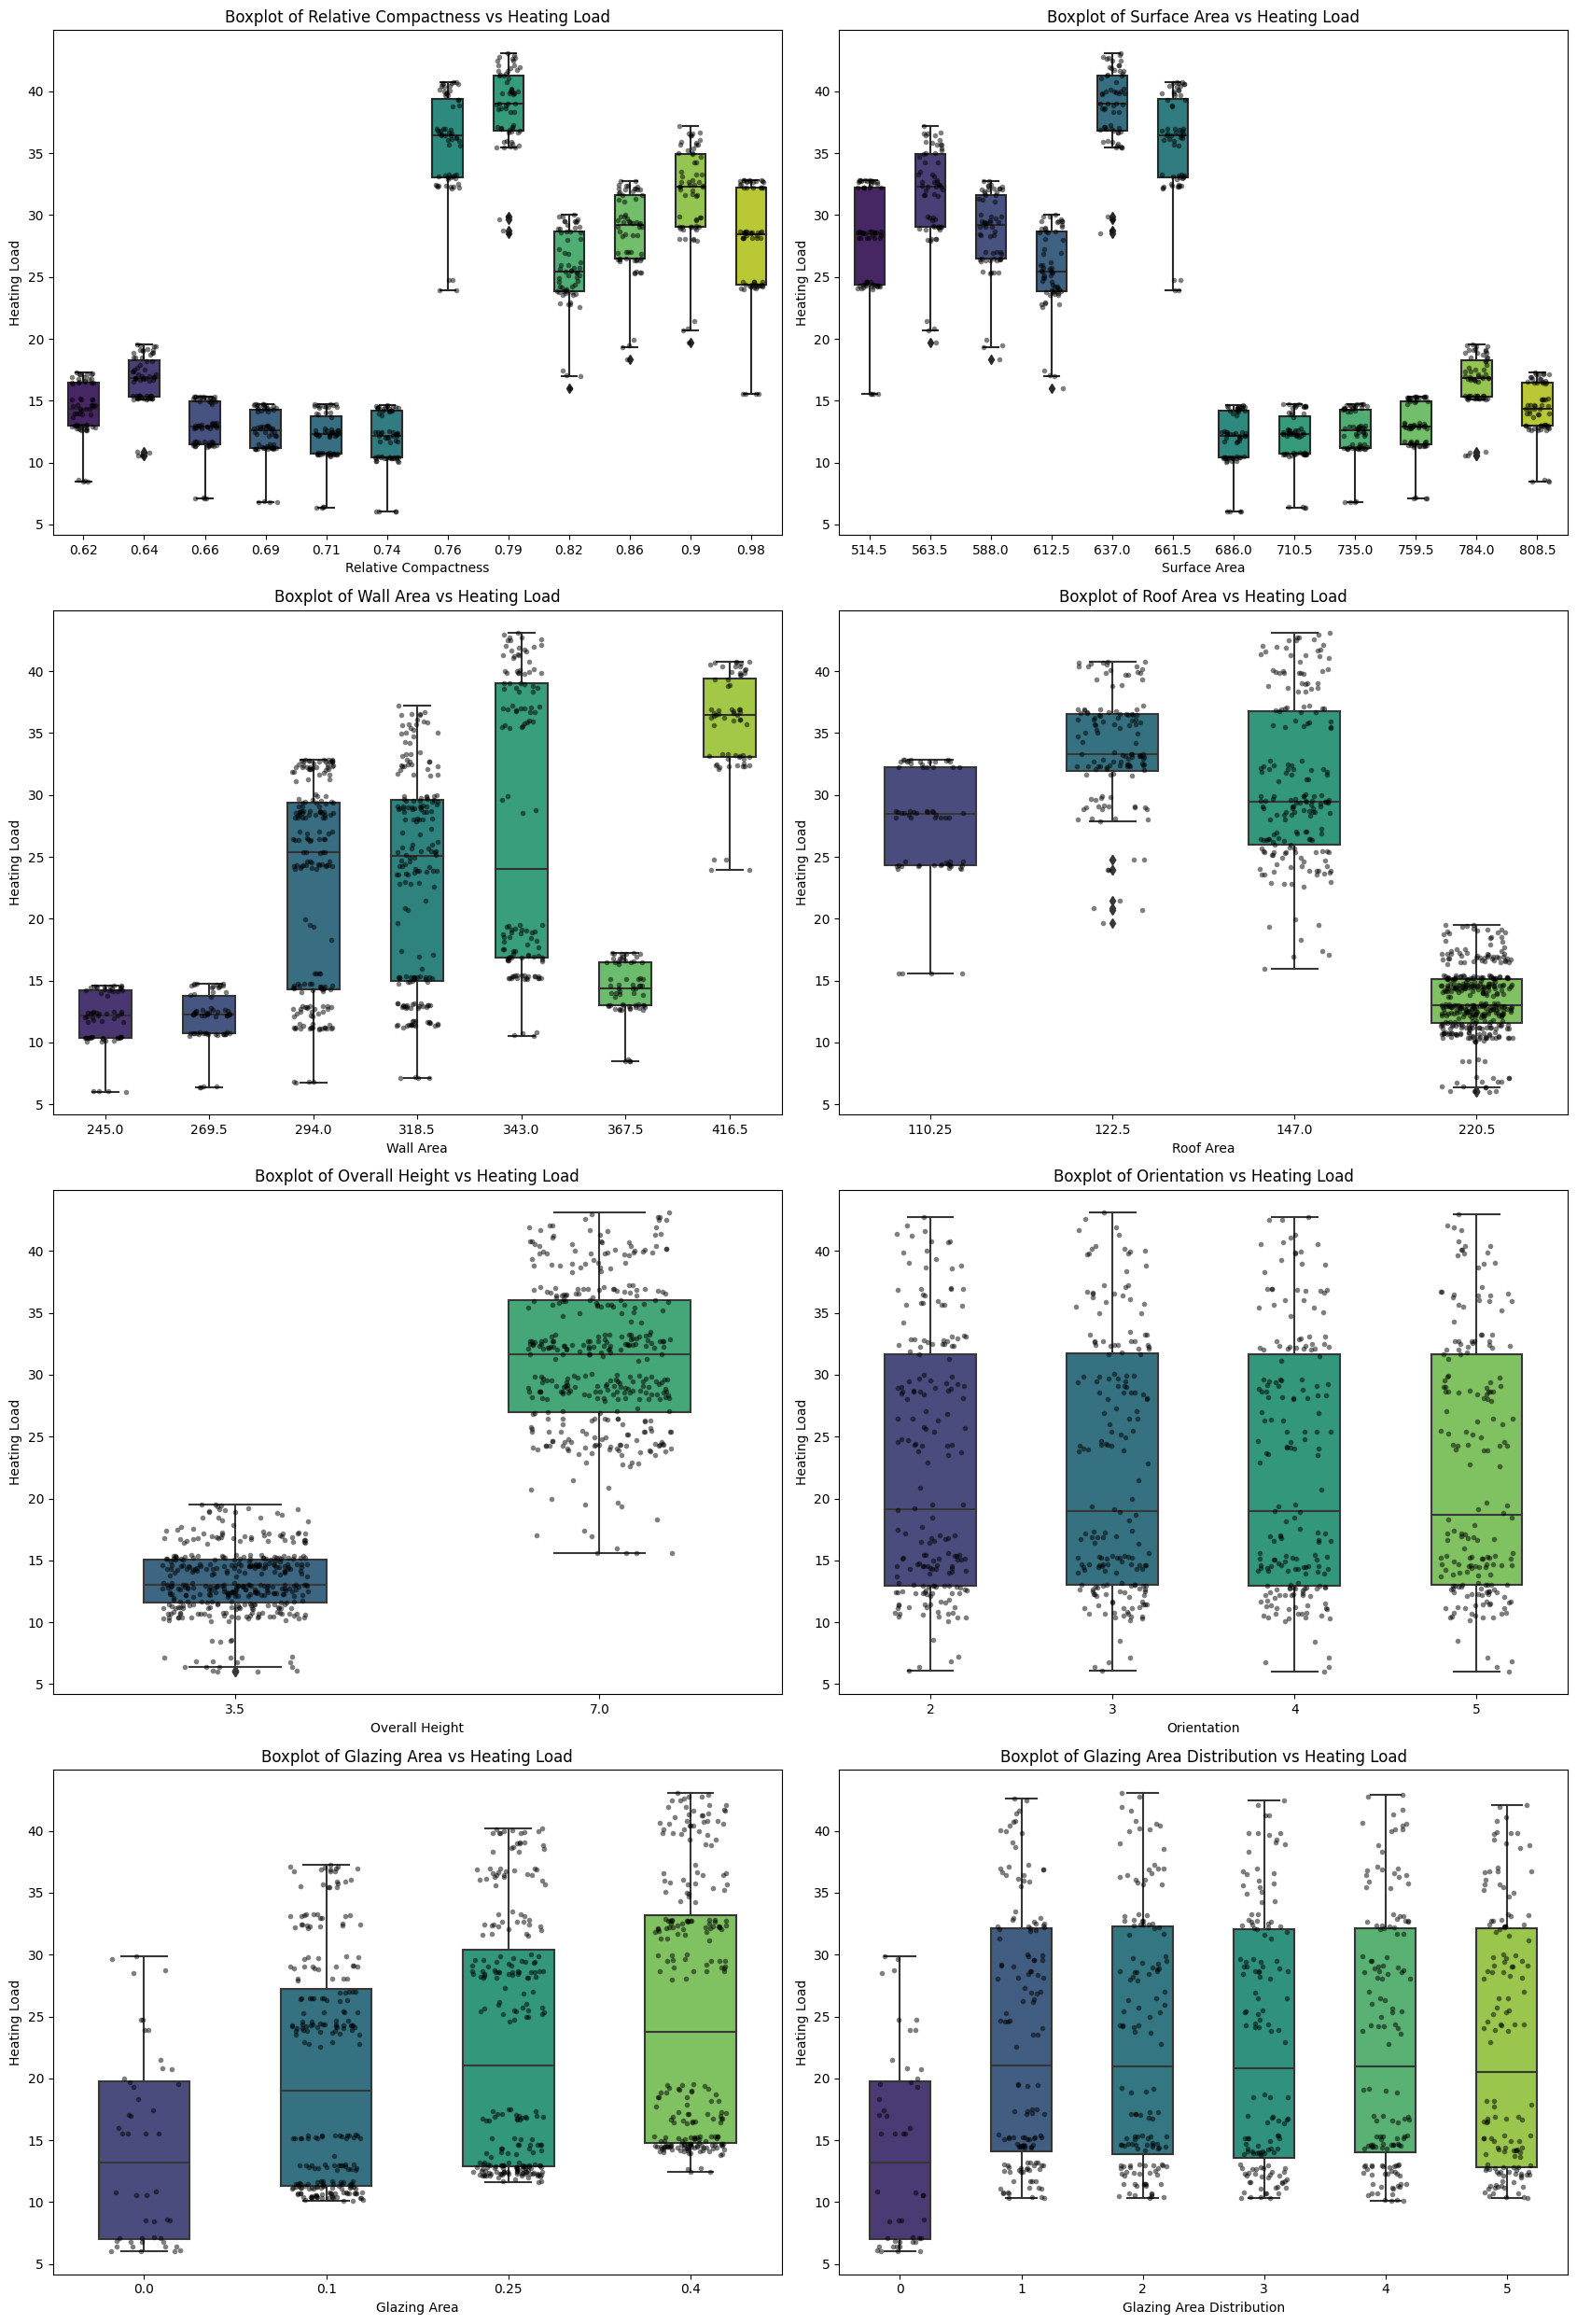

In [266]:
plt.figure(figsize=(17, 25))

for i, feature in enumerate(list(df.columns)[:-2]):
    plt.subplot(4, 2, i + 1)
    sn.boxplot(x=df[feature], y=df["Heating Load"], palette="viridis", width=0.5, linewidth=1.5)
    plt.title(f"Boxplot of {feature} vs Heating Load")

    sn.stripplot(x=df[feature], y=df["Heating Load"], color='black', alpha=0.5, size=4, jitter=0.2)

plt.tight_layout()

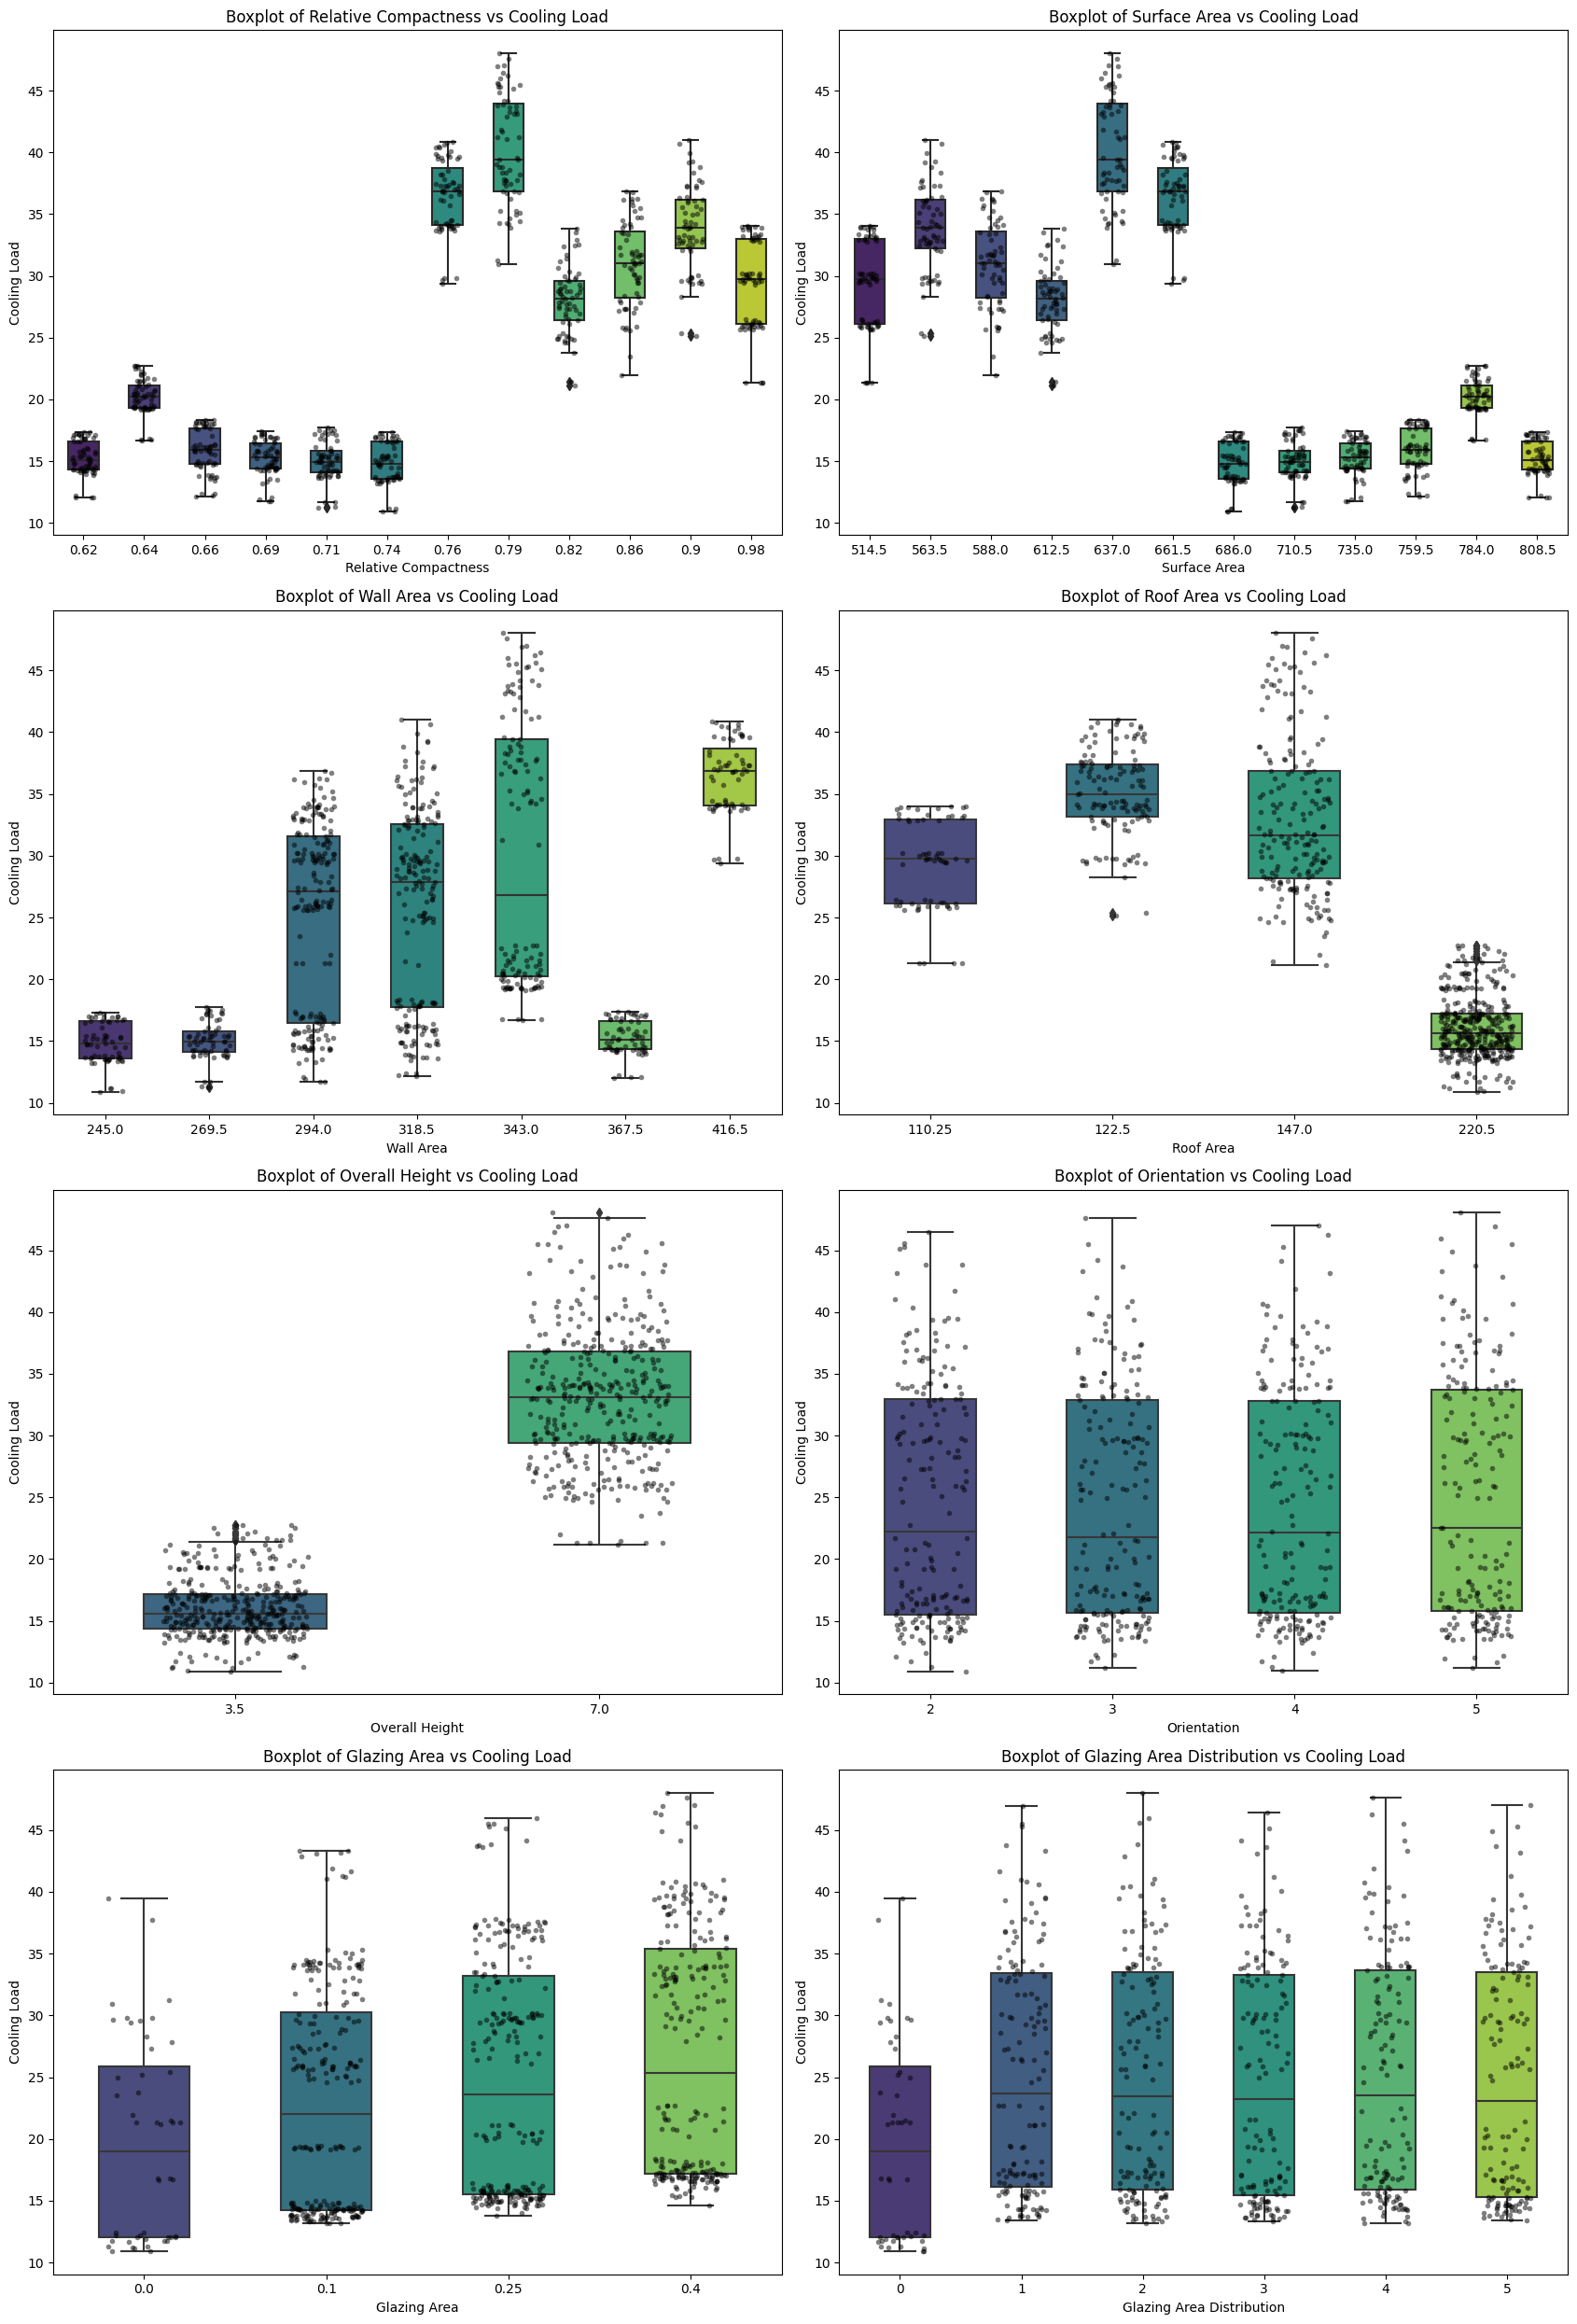

In [268]:
plt.figure(figsize=(17, 25))

for i, feature in enumerate(list(df.columns)[:-2]):
    plt.subplot(4, 2, i + 1)
    sn.boxplot(x=df[feature], y=df["Cooling Load"], palette="viridis", width=0.5, linewidth=1.5)
    plt.title(f"Boxplot of {feature} vs Cooling Load")

    sn.stripplot(x=df[feature], y=df["Cooling Load"], color='black', alpha=0.5, size=4, jitter=0.2)

plt.tight_layout()

Machine Learning/ Predictive Modeling:

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

model_feats = df.drop(columns = ['Orientation'], axis = 1)

scaler = StandardScaler()

X = np.array(model_feats[model_feats.columns[:-2]])
y_heating = np.array(model_feats["Heating Load"])
y_cooling = np.array(model_feats["Cooling Load"])



X_standard = scaler.fit_transform(X)
y_standard_heating = scaler.fit_transform(y_heating.reshape(-1, 1))
y_standard_cooling = scaler.fit_transform(y_cooling.reshape(-1, 1))

X_standard.shape, y_standard_heating.shape, y_standard_cooling.shape

((768, 7), (768, 1), (768, 1))

In [231]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_heating, y_test_heating = train_test_split(X_standard, y_standard_heating, random_state = 21, test_size = 0.2,)

X_train, X_test, y_train_cooling, y_test_cooling = train_test_split(X_standard, y_standard_cooling, random_state = 21, test_size = 0.2,)

X_train.shape, y_train_heating.shape

((614, 7), (614, 1))

In [232]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def train_performance(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, mae, r2

In [233]:
df_heating_results = pd.DataFrame(columns=['Model for Heating', 'MSE', 'MAE', "R2"])
df_cooling_results = pd.DataFrame(columns=['Model for Cooling', 'MSE', 'MAE', "R2"])

df_heating_results

,Model for Heating,MSE,MAE,R2


In [234]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

rand_seed = 11

models = [GradientBoostingRegressor(random_state = rand_seed), RandomForestRegressor(random_state = rand_seed), 
          LinearRegression(), SVR(), CatBoostRegressor(random_state = rand_seed), 
          KNeighborsRegressor(), DecisionTreeRegressor(random_state = rand_seed)]

In [235]:
for model in models:
    heating_mse, heating_mae, heating_r2 = train_performance(model, X_train, y_train_heating, X_test, y_test_heating)

    cooling_mse, cooling_mae, cooling_r2 = train_performance(model, X_train, y_train_cooling, X_test, y_test_cooling)

    df_heating_results = pd.concat([df_heating_results, pd.DataFrame([[model.__class__.__name__, 
                                                       heating_mse, heating_mae, heating_r2]], columns=['Model for Heating', 'MSE', 'MAE', "R2"])], axis=0)

    df_cooling_results = pd.concat([df_cooling_results, pd.DataFrame([[model.__class__.__name__, 
                                                       cooling_mse, cooling_mae, cooling_r2]], columns=['Model for Cooling', 'MSE', 'MAE', "R2"])], axis=0)

/Users/advaykadam/anaconda3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/advaykadam/anaconda3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/advaykadam/anaconda3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/advaykadam/anaconda3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn

Learning rate set to 0.037906
0:	learn: 0.9690217	total: 502us	remaining: 502ms
1:	learn: 0.9393239	total: 724us	remaining: 361ms
2:	learn: 0.9079385	total: 1.02ms	remaining: 339ms
3:	learn: 0.8776453	total: 1.23ms	remaining: 307ms
4:	learn: 0.8492267	total: 1.44ms	remaining: 287ms
5:	learn: 0.8224174	total: 1.6ms	remaining: 265ms
6:	learn: 0.7956007	total: 1.81ms	remaining: 256ms
7:	learn: 0.7732579	total: 1.86ms	remaining: 231ms
8:	learn: 0.7486434	total: 2.11ms	remaining: 233ms
9:	learn: 0.7250182	total: 2.33ms	remaining: 231ms
10:	learn: 0.7040028	total: 2.57ms	remaining: 231ms
11:	learn: 0.6809721	total: 3.58ms	remaining: 295ms
12:	learn: 0.6595269	total: 3.8ms	remaining: 289ms
13:	learn: 0.6382057	total: 3.93ms	remaining: 277ms
14:	learn: 0.6192182	total: 4.08ms	remaining: 268ms
15:	learn: 0.5990932	total: 4.26ms	remaining: 262ms
16:	learn: 0.5802637	total: 4.47ms	remaining: 259ms
17:	learn: 0.5622334	total: 4.6ms	remaining: 251ms
18:	learn: 0.5470061	total: 4.71ms	remaining: 243

In [236]:
df_heating_results

,Model for Heating,MSE,MAE,R2
0,GradientBoostingRegressor,0.002412,0.034737,0.997532
0,RandomForestRegressor,0.002596,0.035428,0.997344
0,LinearRegression,0.080589,0.198830,0.917542
0,SVR,0.043495,0.135482,0.955497
0,CatBoostRegressor,0.002522,0.034695,0.997419
0,KNeighborsRegressor,0.011091,0.053247,0.988652
0,DecisionTreeRegressor,0.002851,0.036813,0.997083


In [237]:
df_cooling_results

,Model for Cooling,MSE,MAE,R2
0,GradientBoostingRegressor,0.034791,0.117092,0.964707
0,RandomForestRegressor,0.054168,0.140428,0.945052
0,LinearRegression,0.109331,0.230118,0.889095
0,SVR,0.075295,0.176245,0.923621
0,CatBoostRegressor,0.053500,0.140509,0.945729
0,KNeighborsRegressor,0.061856,0.140959,0.937253
0,DecisionTreeRegressor,0.060012,0.146659,0.939124


In [238]:
def display_training(epoch, train_loss, test_loss):
    return f"Epoch: {epoch} | Train Loss: {train_loss} | Test Loss: {test_loss}"

In [239]:
#simple neural network to predict heating load
import torch
from torch import nn
import torch.optim as optim

X_train, X_test, y_train_heating, y_test_heating = train_test_split(X_standard, y_standard_heating, test_size = 0.2, random_state = 21)

X_train = torch.from_numpy(X_train)
y_train_heating = torch.from_numpy(y_train_heating)
X_test = torch.from_numpy(X_test)
y_test_heating = torch.from_numpy(y_test_heating)

class Load_NN(nn.Module):
    def __init__(self):
        super().__init__()

        # self.linear_layer1 = nn.Linear(in_features = 5, out_features = 5)
        # self.linear_layer2 = nn.Linear(in_features = 5, out_features = 1)

        self.layers = nn.Sequential(
            nn.Linear(in_features = 7, out_features = 8, dtype = torch.float64),
            nn.Linear(in_features = 8, out_features = 1, dtype = torch.float64)
        )

    def forward(self, x):
        return self.layers(x)

In [240]:
nn_heat_model = Load_NN()
nn_heat_model.state_dict()

OrderedDict([('layers.0.weight',
              tensor([[ 1.2448e-01, -9.9145e-06,  1.5994e-01,  3.8063e-02,  3.3440e-01,
                       -8.8038e-02,  1.0035e-01],
                      [ 5.0570e-02, -1.2171e-01,  3.1745e-01,  8.8368e-02,  3.7470e-02,
                       -3.1292e-01,  3.5510e-01],
                      [-1.9070e-01, -3.5227e-02, -2.6089e-01,  1.9819e-01,  7.6654e-02,
                       -3.6883e-02, -2.7904e-01],
                      [-2.5380e-01,  7.7010e-02,  9.4984e-02,  2.8298e-01,  2.7264e-01,
                       -2.3677e-01,  3.0776e-01],
                      [-3.6781e-01,  3.2336e-01, -3.0455e-01, -1.2596e-01,  3.1214e-01,
                        2.2339e-01, -1.8086e-01],
                      [ 2.5227e-01, -4.5374e-02, -2.7263e-01, -3.4496e-01,  1.0287e-01,
                       -3.2931e-02,  3.0220e-01],
                      [-4.1908e-02,  2.4901e-01, -2.3842e-01,  1.3966e-02, -2.8002e-01,
                       -1.4975e-01,  1.1175e-01],
 

In [241]:
mae_loss_fn = nn.L1Loss()
mse_loss_fn = nn.MSELoss()
optimizer = optim.SGD(nn_heat_model.parameters(), lr=0.01)

def display_training(epoch, train_loss, test_loss):
    return f"Epoch: {epoch} | Train Loss: {train_loss} | Test Loss: {test_loss}"
    
epoch_counts = [i for i in range(200)]
heat_train_loss_track = []
heat_test_loss_track = []


torch.manual_seed(10)

epochs = 200

for epoch in range(epochs):
    nn_heat_model.train()

    y_pred = nn_heat_model(X_train)

    #mae_loss = mae_loss_fn(y_pred, y_train)
    mse_loss = mse_loss_fn(y_pred, y_train_heating)

    optimizer.zero_grad()

    mse_loss.backward()

    optimizer.step()

    nn_heat_model.eval()
    with torch.inference_mode():
        heat_test_preds = nn_heat_model(X_test)

        test_mse_loss = mse_loss_fn(heat_test_preds, y_test_heating)

    heat_train_loss_track.append(mse_loss.item())
    heat_test_loss_track.append(test_mse_loss.item())

    
    print(display_training(epoch, mse_loss, test_mse_loss))


Epoch: 0 | Train Loss: 1.0941447646825215 | Test Loss: 1.0239992254483254
Epoch: 1 | Train Loss: 1.0344759382924174 | Test Loss: 0.9710090358227066
Epoch: 2 | Train Loss: 0.9793497369702868 | Test Loss: 0.9217758413912535
Epoch: 3 | Train Loss: 0.9282774297504245 | Test Loss: 0.8759172718074852
Epoch: 4 | Train Loss: 0.8808527318905889 | Test Loss: 0.8331134246821941
Epoch: 5 | Train Loss: 0.8367348143933838 | Test Loss: 0.7930943567655047
Epoch: 6 | Train Loss: 0.7956349958258234 | Test Loss: 0.7556301808482142
Epoch: 7 | Train Loss: 0.7573062422291158 | Test Loss: 0.7205231779031287
Epoch: 8 | Train Loss: 0.7215348391036954 | Test Loss: 0.687601488898055
Epoch: 9 | Train Loss: 0.6881337658702965 | Test Loss: 0.6567140601849308
Epoch: 10 | Train Loss: 0.6569374206263061 | Test Loss: 0.6277265944243551
Epoch: 11 | Train Loss: 0.6277974266346945 | Test Loss: 0.6005183151532278
Epoch: 12 | Train Loss: 0.6005793121025098 | Test Loss: 0.5749793938926291
Epoch: 13 | Train Loss: 0.5751598985

In [242]:
#simple neural network to predict heating load
import torch
from torch import nn
import torch.optim as optim

X_train, X_test, y_train_cooling, y_test_cooling = train_test_split(X_standard, y_standard_cooling, test_size = 0.2, random_state = 21)

X_train = torch.from_numpy(X_train)
y_train_cooling = torch.from_numpy(y_train_cooling)
X_test = torch.from_numpy(X_test)
y_test_cooling = torch.from_numpy(y_test_cooling)

class Load_NN(nn.Module):
    def __init__(self):
        super().__init__()

        # self.linear_layer1 = nn.Linear(in_features = 5, out_features = 5)
        # self.linear_layer2 = nn.Linear(in_features = 5, out_features = 1)

        self.layers = nn.Sequential(
            nn.Linear(in_features = 7, out_features = 8, dtype = torch.float64),
            nn.Linear(in_features = 8, out_features = 1, dtype = torch.float64)
        )

    def forward(self, x):
        return self.layers(x)

In [243]:
nn_cool_model = Load_NN()
nn_cool_model.state_dict()

OrderedDict([('layers.0.weight',
              tensor([[ 1.2448e-01, -9.9145e-06,  1.5994e-01,  3.8063e-02,  3.3440e-01,
                       -8.8038e-02,  1.0035e-01],
                      [ 5.0570e-02, -1.2171e-01,  3.1745e-01,  8.8368e-02,  3.7470e-02,
                       -3.1292e-01,  3.5510e-01],
                      [-1.9070e-01, -3.5227e-02, -2.6089e-01,  1.9819e-01,  7.6654e-02,
                       -3.6883e-02, -2.7904e-01],
                      [-2.5380e-01,  7.7010e-02,  9.4984e-02,  2.8298e-01,  2.7264e-01,
                       -2.3677e-01,  3.0776e-01],
                      [-3.6781e-01,  3.2336e-01, -3.0455e-01, -1.2596e-01,  3.1214e-01,
                        2.2339e-01, -1.8086e-01],
                      [ 2.5227e-01, -4.5374e-02, -2.7263e-01, -3.4496e-01,  1.0287e-01,
                       -3.2931e-02,  3.0220e-01],
                      [-4.1908e-02,  2.4901e-01, -2.3842e-01,  1.3966e-02, -2.8002e-01,
                       -1.4975e-01,  1.1175e-01],
 

In [244]:
mae_loss_fn_cool = nn.L1Loss()
mse_loss_fn_cool = nn.MSELoss()
optimizer = optim.SGD(nn_cool_model.parameters(), lr=0.01)

def display_training(epoch, train_loss, test_loss):
    return f"Epoch: {epoch} | Train Loss: {train_loss} | Test Loss: {test_loss}"
    
epoch_counts = [i for i in range(200)]
cool_train_loss_track = []
cool_test_loss_track = []


torch.manual_seed(10)

epochs = 200

for epoch in range(epochs):
    nn_cool_model.train()

    y_pred_cool = nn_cool_model(X_train)

    #mae_loss = mae_loss_fn(y_pred, y_train)
    mse_loss = mse_loss_fn_cool(y_pred_cool, y_train_cooling)

    optimizer.zero_grad()

    mse_loss.backward()

    optimizer.step()

    nn_cool_model.eval()
    with torch.inference_mode():
        cool_test_preds = nn_cool_model(X_test)

        test_mse_loss = mse_loss_fn_cool(cool_test_preds, y_test_cooling)

    cool_train_loss_track.append(mse_loss.item())
    cool_test_loss_track.append(test_mse_loss.item())

    
    print(display_training(epoch, mse_loss, test_mse_loss))

Epoch: 0 | Train Loss: 1.1018270773425456 | Test Loss: 1.0366052353731912
Epoch: 1 | Train Loss: 1.0428767121790685 | Test Loss: 0.9840799098694735
Epoch: 2 | Train Loss: 0.9884693801146734 | Test Loss: 0.9353215340698677
Epoch: 3 | Train Loss: 0.9381145431384882 | Test Loss: 0.8899453996657526
Epoch: 4 | Train Loss: 0.8914042389436831 | Test Loss: 0.8476295391397597
Epoch: 5 | Train Loss: 0.8479960603492689 | Test Loss: 0.8081021625655902
Epoch: 6 | Train Loss: 0.8075998364266374 | Test Loss: 0.7711317200698646
Epoch: 7 | Train Loss: 0.7699671338376868 | Test Loss: 0.736518992952591
Epoch: 8 | Train Loss: 0.7348829371728127 | Test Loss: 0.7040907731638613
Epoch: 9 | Train Loss: 0.7021590349497892 | Test Loss: 0.6736948015925265
Epoch: 10 | Train Loss: 0.6716287564130666 | Test Loss: 0.6451957146307475
Epoch: 11 | Train Loss: 0.6431427886952961 | Test Loss: 0.6184718053550349
Epoch: 12 | Train Loss: 0.6165658646544917 | Test Loss: 0.593412447022727
Epoch: 13 | Train Loss: 0.59177415591

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Cooling Load')]

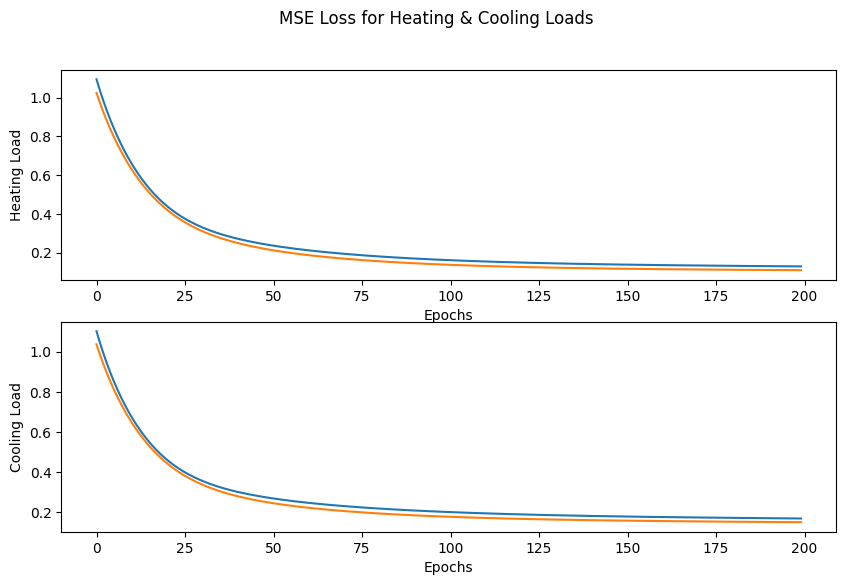

In [245]:
fig, axs = plt.subplots(2, figsize=(10, 6))
fig.suptitle('MSE Loss for Heating & Cooling Loads')
axs[0].plot(epoch_counts, heat_train_loss_track)
axs[0].plot(epoch_counts, heat_test_loss_track)
axs[0].set(xlabel='Epochs', ylabel='Heating Load')
axs[1].plot(epoch_counts, cool_train_loss_track)
axs[1].plot(epoch_counts, cool_test_loss_track)
axs[1].set(xlabel='Epochs', ylabel='Cooling Load')

In [246]:
from torcheval.metrics import R2Score

r2_heat = R2Score()
r2_heat.update(heat_test_preds, y_test_heating)
r2_heat = r2_heat.compute().numpy().item()
print (f"r^2 for heating load: {r2_heat}")

r^2 for heating load: 0.8876604709360306


In [247]:
r2_cool = R2Score()
r2_cool.update(cool_test_preds, y_test_cooling)
r2_cool = r2_cool.compute().numpy().item()
print (f"r^2 for cooling load: {r2_cool}")

r^2 for cooling load: 0.8482505187093361


In [248]:
df_heating_results.loc[len(df_heating_results)] = ["Neural Network", heat_test_loss_track[-1], "NA", r2_heat]
df_heating_results

,Model for Heating,MSE,MAE,R2
0,GradientBoostingRegressor,0.002412,0.034737,0.997532
0,RandomForestRegressor,0.002596,0.035428,0.997344
0,LinearRegression,0.080589,0.19883,0.917542
0,SVR,0.043495,0.135482,0.955497
0,CatBoostRegressor,0.002522,0.034695,0.997419
0,KNeighborsRegressor,0.011091,0.053247,0.988652
0,DecisionTreeRegressor,0.002851,0.036813,0.997083
7,Neural Network,0.109794,NA,0.887660


In [249]:
df_cooling_results.loc[len(df_heating_results)] = ["Neural Network",  cool_test_loss_track[-1], "NA", r2_cool]
df_cooling_results

,Model for Cooling,MSE,MAE,R2
0,GradientBoostingRegressor,0.034791,0.117092,0.964707
0,RandomForestRegressor,0.054168,0.140428,0.945052
0,LinearRegression,0.109331,0.230118,0.889095
0,SVR,0.075295,0.176245,0.923621
0,CatBoostRegressor,0.053500,0.140509,0.945729
0,KNeighborsRegressor,0.061856,0.140959,0.937253
0,DecisionTreeRegressor,0.060012,0.146659,0.939124
8,Neural Network,0.149595,NA,0.848251


In [250]:
df_heating_results = df_heating_results.sort_values(by='R2', ascending=False).reset_index(drop=True)
df_cooling_results = df_cooling_results.sort_values(by='R2', ascending=False).reset_index(drop=True)

In [251]:
df_heating_results

,Model for Heating,MSE,MAE,R2
0,GradientBoostingRegressor,0.002412,0.034737,0.997532
1,CatBoostRegressor,0.002522,0.034695,0.997419
2,RandomForestRegressor,0.002596,0.035428,0.997344
3,DecisionTreeRegressor,0.002851,0.036813,0.997083
4,KNeighborsRegressor,0.011091,0.053247,0.988652
5,SVR,0.043495,0.135482,0.955497
6,LinearRegression,0.080589,0.19883,0.917542
7,Neural Network,0.109794,NA,0.887660


In [252]:
df_cooling_results

,Model for Cooling,MSE,MAE,R2
0,GradientBoostingRegressor,0.034791,0.117092,0.964707
1,CatBoostRegressor,0.053500,0.140509,0.945729
2,RandomForestRegressor,0.054168,0.140428,0.945052
3,DecisionTreeRegressor,0.060012,0.146659,0.939124
4,KNeighborsRegressor,0.061856,0.140959,0.937253
5,SVR,0.075295,0.176245,0.923621
6,LinearRegression,0.109331,0.230118,0.889095
7,Neural Network,0.149595,NA,0.848251


In [253]:
random_forest_heating = RandomForestRegressor().fit(X_train, y_train_heating)
random_forest_cooling = RandomForestRegressor().fit(X_train, y_train_cooling)

/Users/advaykadam/anaconda3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/advaykadam/anaconda3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [254]:
importance_heating = random_forest_heating.feature_importances_
importance_cooling = random_forest_cooling.feature_importances_

In [255]:
importance_heating

array([0.09840235, 0.16542329, 0.04368389, 0.33382805, 0.26794007,
       0.07369822, 0.01702411])

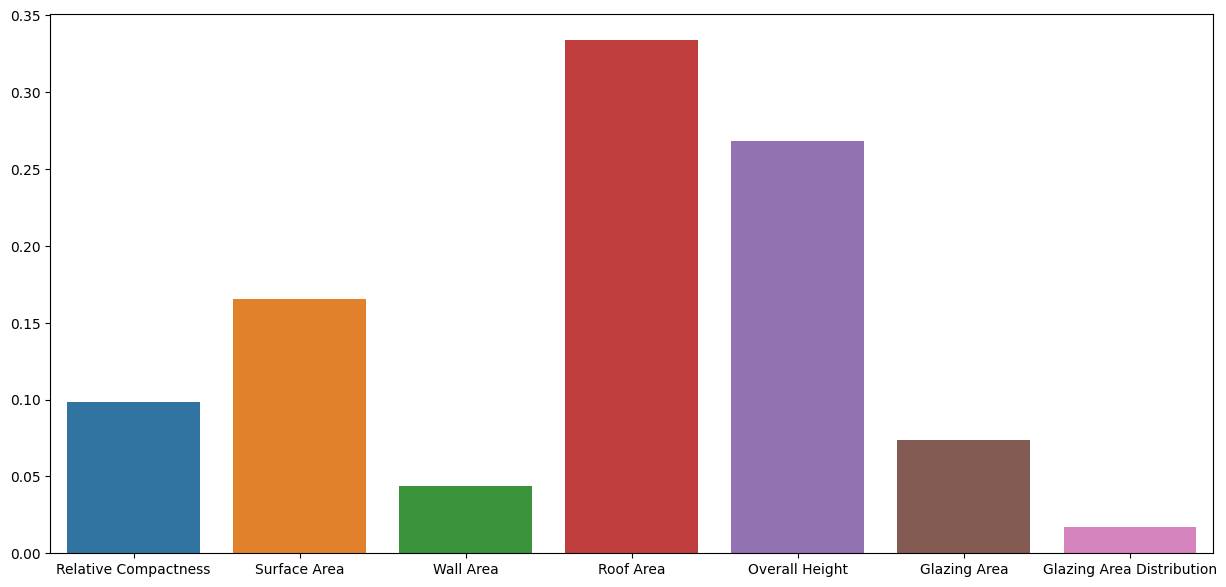

In [263]:
plt.figure(figsize=(15, 7))
sn.barplot(x = list(model_feats.columns[:-2]), y = importance_heating)
plt.show()

In [257]:
importance_cooling

array([0.55910907, 0.12076573, 0.02504244, 0.10068034, 0.13013974,
       0.05165679, 0.01260589])

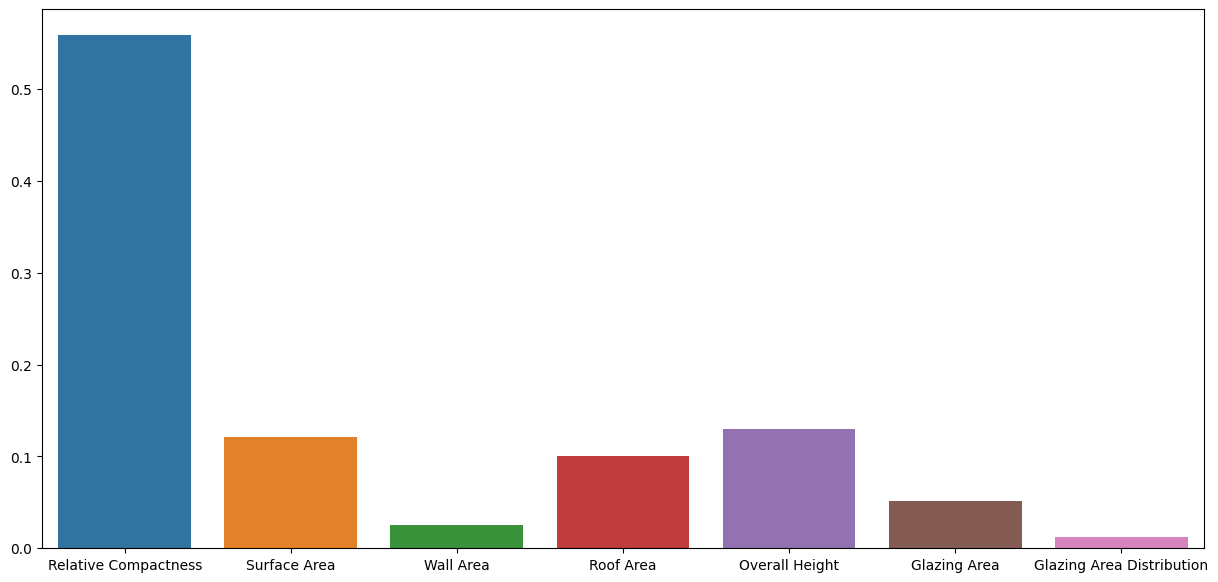

In [264]:
plt.figure(figsize=(15, 7))
sn.barplot(x = list(model_feats.columns[:-2]), y = importance_cooling)
plt.show()